<table style="width: 100%; border-collapse: collapse;" border="0">
<tr>
<td><b>Created:</b> Tuesday 31 January 2017</td>
<td style="text-align: right;"><a href="https://www.github.com/rhyswhitley/fire_limitation">github.com/rhyswhitley/fire_limitation</td>
</tr>
</table>

<div>
<center>
<font face="Times">
<br>
<h1>Quantifying the uncertainity of a global fire limitation model using Bayesian inference</h1>
<h2>Part 3: Data visualisation</h2>
<br>
<br>
<sup>1,* </sup>Douglas Kelley, 
<sup>2 </sup>Ioannis Bistinas, 
<sup>3, 4 </sup>Chantelle Burton, 
<sup>1 </sup><s>Tobias Marthews,</s>
<sup>5 </sup>Rhys Whitley
<br>
<br>
<br>
<sup>1 </sup>Centre for Ecology and Hydrology, Maclean Building, Crowmarsh Gifford, Wallingford, Oxfordshire, United Kingdom
<br>
<sup>2 </sup>Vrije Universiteit Amsterdam, Faculty of Earth and Life Sciences, Amsterdam, Netherlands
<br>
<sup>3 </sup>Met Office United Kingdom, Exeter, United Kingdom
<br>
<sup>4 </sup>Geography, University of Exeter, Exeter, United Kingdom
<br>
<sup>5 </sup>Natural Perils Pricing, Commercial & Consumer Portfolio & Pricing, Suncorp Group, Sydney, Australia
<br>

### Load libraries

In [ ]:
# data munging and analytical libraries 
import re
import os
import numpy as np
import pandas as pd

# graphical libraries
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# default plot settings for notebook
from IPython.core.pylabtools import figsize
figsize(11, 9)
plt.style.use('ggplot')

%matplotlib inline

dataPath = "../data/globfire.csv"

### Import data

In [ ]:
DATAPATH = os.path.expanduser(dataPath)

fd = pd.read_csv(DATAPATH)

### Function definitions

In [ ]:
def ignition(lightning, pasture_area, pop_density, kp, kd1):
    """
    Definition for the measure of ignition
    """
    return lightning + kp*pasture_area + kd1*pop_density

def supression(crop_area, pop_density, kd2):
    """
    Definition for the measure of fire supression
    """
    return crop_area + kd2*pop_density

def np_sigmoid(x, a, b):
    """
    Sigmoid function to describe limitation using tensor
    """
    return 1.0/(1.0 + np.exp(a*x + b))

### Extra model covariates determined

Determine the ignition and supression covariates as per the model documentation

In [ ]:
fd['ignite'] = ignition(fd["lightning_ignitions"].values, \
               fd["pasture"].values, \
               fd["population_density"].values, \
               500, 10)

fd['suppress'] = supression(fd["cropland"].values, \
                 fd["population_density"].values, \
                 10)

## Data viz below

### Base Data

In [ ]:
def pltVsFire(x, xlab):
    plt.plot(x, fd.fire, 'o', alpha = 0.01)
    plt.ylabel("Burnt area fraction")
    plt.xlabel(xlab);

In [ ]:
pltVsFire(fd.NPP, "NPP weight per area");
plt.xscale('log')

In [ ]:
pltVsFire(fd.alpha, "Alpha")

In [ ]:
pltVsFire(fd.lightning_ignitions, "lightning strikes")
plt.xscale('log')

In [ ]:
pltVsFire(fd.cropland, "Crop cover")

### Secondary Data

In [ ]:
pltVsFire(fd.pasture, "Pasture")

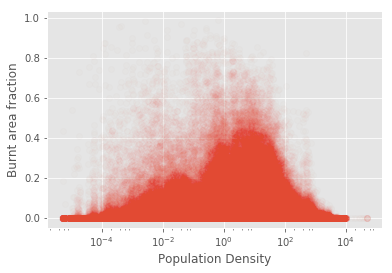

In [ ]:
pltVsFire(fd.population_density, "Population Density")
plt.xscale('log')